# Symbolic calculation

In [1]:
import sympy
from sympy import cos, sin
sympy.init_printing()

In [104]:
x0, y0, alpha0 = sympy.symbols("x_0, y_0, alpha_0")
x, y = sympy.symbols("x, y")
l, l1, l2, l3, l4 = sympy.symbols("l, l_1, l_2, l_3, l_4")
r1, r2, r3, r4, r5 = sympy.symbols("r_1, r_2, r_3, r_4, r_5")
r01, r02, r03, r04, r05 = sympy.symbols("r0_1, r0_2, r0_3, r0_4, r0_5")
# l_1 - distance between center and 1, 2 sensors
# l_2 - distance along y axes from center to 3, 4 sensors
# l - side of cubes
L_x = sympy.Equality(sin(alpha0) * (x - x0) + cos(alpha0) * (y - y0), 0)
L_y = sympy.Equality(cos(alpha0) * (x - x0) + sin(alpha0) * (y - y0), 0)

In [105]:
x1, y1 = x0 + cos(alpha0) * 3 * l / 2, y0 + sin(alpha0) * 3 * l / 2
x2, y2 = x0 - cos(alpha0) * 3 * l / 2, y0 - sin(alpha0) * 3 * l / 2
x3, y3 = x0 - sin(alpha0) * l / 2, y0 + cos(alpha0) * l / 2
x4, y4 = x0 - sin(alpha0) * 3 * l / 2, y0 + cos(alpha0) * 3 * l / 2
L1 = sympy.Equality(cos(alpha0) * (x - x1) + sin(alpha0) * (y - y1), 0)
L2 = sympy.Equality(cos(alpha0) * (x - x2) + sin(alpha0) * (y - y2), 0)
L3 = sympy.Equality(-sin(alpha0) * (x - x3) + cos(alpha0) * (y - y3), 0)
L4 = sympy.Equality(-sin(alpha0) * (x - x4) + cos(alpha0) * (y - y4), 0)

In [106]:
r_c = [None, None, None, None, None]

In [107]:
r_c[0] = r01 + 3 * l / 2 - sympy.solve(L1.subs(y, 0), x)[0]
r_c[4] = r05 + 3 * l / 2 + sympy.solve(L2.subs(y, 0), x)[0]

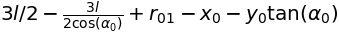

In [108]:
r_c[0]

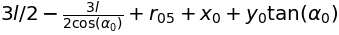

In [109]:
r_c[4]

In [128]:
r_c[1] = r02 + l / 2 - sympy.solve(L3.subs(x, l2), y)[0]
r_c[2] = r03 + 3 * l / 2 - sympy.solve(L4.subs(x, 0), y)[0]
r_c[3] = r04 + l / 2 - sympy.solve(L3.subs(x, -l2), y)[0]

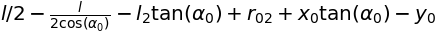

In [129]:
r_c[1]

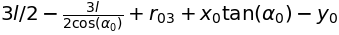

In [130]:
r_c[2]

In [131]:
r0s = [r01, r02, r03, r04, r04]

In [132]:
r_f = [sympy.lambdify((x0, y0, alpha0, l, l2, y_), x_) for x_, y_ in zip(r_c, r0s)]

In [133]:
for i in range(5):
    print(r_c[i])

3*l/2 - 3*l/(2*cos(alpha_0)) + r0_1 - x_0 - y_0*tan(alpha_0)
l/2 - l/(2*cos(alpha_0)) - l_2*tan(alpha_0) + r0_2 + x_0*tan(alpha_0) - y_0
3*l/2 - 3*l/(2*cos(alpha_0)) + r0_3 + x_0*tan(alpha_0) - y_0
l/2 - l/(2*cos(alpha_0)) + l_2*tan(alpha_0) + r0_4 + x_0*tan(alpha_0) - y_0
3*l/2 - 3*l/(2*cos(alpha_0)) + r0_5 + x_0 + y_0*tan(alpha_0)


## Linear case

In [134]:
init_params = [(x0, 0), (y0, 0), (alpha0, 0)]
A_c = sympy.Matrix([[sympy.diff(expr, x_).subs(init_params) for expr in r_c]
              for x_ in [x0, y0, alpha0]]).T
A_c

⎡-1  0    0 ⎤
⎢           ⎥
⎢0   -1  -l₂⎥
⎢           ⎥
⎢0   -1   0 ⎥
⎢           ⎥
⎢0   -1  l₂ ⎥
⎢           ⎥
⎣1   0    0 ⎦

In [155]:
A_c_1 = A_c[:, :]
A_c_1.row_del(2)
A_c_1.row_del(1)
A_c_1.col_del(2)

In [156]:
(A_c_1.T * A_c_1) ** (-1) * A_c_1.T

⎡-1/2  0   1/2⎤
⎢             ⎥
⎣ 0    -1   0 ⎦

In [127]:
A = sympy.lambdify(l2, A_c)

In [56]:
A_common = sympy.simplify(sympy.Matrix([[sympy.diff(expr, x_) for expr in r_c]
              for x_ in [x0, y0, alpha0]]).T)
A_common = sympy.lambdify((x0, y0, alpha0, l, l2), A_common)

In [57]:
sympy.simplify(sympy.Matrix([[sympy.diff(expr, x_) for expr in r_c]
              for x_ in [x0, y0, alpha0]]).T)

⎡                    ⎛3⋅l⋅sin(α₀)     ⎞  ⎤
⎢                   -⎜─────────── + y₀⎟  ⎥
⎢                    ⎝     2          ⎠  ⎥
⎢  -1     -tan(α₀)  ──────────────────── ⎥
⎢                            2           ⎥
⎢                         cos (α₀)       ⎥
⎢                                        ⎥
⎢                     l⋅sin(α₀)          ⎥
⎢                   - ───────── - l₂ + x₀⎥
⎢                         2              ⎥
⎢tan(α₀)     -1     ─────────────────────⎥
⎢                             2          ⎥
⎢                          cos (α₀)      ⎥
⎢                                        ⎥
⎢                      3⋅l⋅sin(α₀)       ⎥
⎢                    - ─────────── + x₀  ⎥
⎢                           2            ⎥
⎢tan(α₀)     -1      ──────────────────  ⎥
⎢                            2           ⎥
⎢                         cos (α₀)       ⎥
⎢                                        ⎥
⎢                     l⋅sin(α₀)          ⎥
⎢                   - ───────── + l₂ + x₀⎥
⎢          

## Second order case

In [58]:
A2_c = [None, None, None, None]
for i in range(4):
    A2_c[i] = sympy.Matrix([[sympy.diff(r_c[i], x_, y_).subs(init_params) for x_ in 
                          [x0, y0, alpha0]] for y_ in [x0, y0, alpha0]]).T
A2_c

⎡⎡0  0     0  ⎤  ⎡0  0   1 ⎤  ⎡0  0    1  ⎤  ⎡0  0   1 ⎤⎤
⎢⎢            ⎥  ⎢         ⎥  ⎢           ⎥  ⎢         ⎥⎥
⎢⎢0  0    -1  ⎥  ⎢0  0   0 ⎥  ⎢0  0    0  ⎥  ⎢0  0   0 ⎥⎥
⎢⎢            ⎥, ⎢         ⎥, ⎢           ⎥, ⎢         ⎥⎥
⎢⎢       -3⋅l ⎥  ⎢      -l ⎥  ⎢      -3⋅l ⎥  ⎢      -l ⎥⎥
⎢⎢0  -1  ─────⎥  ⎢1  0  ───⎥  ⎢1  0  ─────⎥  ⎢1  0  ───⎥⎥
⎣⎣         2  ⎦  ⎣       2 ⎦  ⎣        2  ⎦  ⎣       2 ⎦⎦

## Itarative method

# Numeric 

In [59]:
import scipy.optimize
import numpy as np

In [65]:
l = 58
l2 = 55
r0s = np.array([35, 85, 25, 85, 35])
rs = np.array([5, 95, 33, 75, 55])

In [69]:
rs1 = np.array([r_f[i](20, 40, 0.15, l, l2, r0s[i]) for i in range(5)])
rs = rs1

In [70]:
def fun(X, l, l2, r0s, rs):
    return np.array([f_(X[0], X[1], X[2], l, l2, r0_) - r_ for f_, r0_, r_
                     in zip(r_f, r0s, rs)])

In [71]:
fun([0, 0, 0], l, l2, r0s, rs)

array([27.03341923494058, 45.61906946957659, 37.96530615144288,
       28.994195483164127, -25.0573982097230], dtype=object)

In [72]:
X_true = scipy.optimize.least_squares(fun, np.array([0, 0, 0]), 
                             bounds=[(-30, -30, -np.pi / 6), (30, 30, np.pi / 6)], 
                             args=[l, l2, r0s, rs]).x
X_true.round(3)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Linear case

In [88]:
A(l2)

array([[ -1,   0,   0],
       [  0,  -1, -55],
       [  0,  -1,   0],
       [  0,  -1,  55],
       [  1,   0,   0]])

In [94]:
#A_ = A(l2)[[0, 1, 2, 4]]
A_ = A(l2)
#A_r = np.linalg.lstsq(A_, np.eye(A_.shape[0]), rcond=None)[0]
A_r = np.linalg.inv(A_.T.dot(A_)).dot(A_.T)
A_r.round(3)

array([[-0.5  ,  0.   ,  0.   ,  0.   ,  0.5  ],
       [ 0.   , -0.333, -0.333, -0.333,  0.   ],
       [ 0.   , -0.009,  0.   ,  0.009,  0.   ]])

In [90]:
A_r.dot(A_).round(2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [36]:
A_r = np.linalg.lstsq(A(l2), np.eye(4), rcond=None)[0]
A_r.round(2)

array([[-0.5 ,  0.  ,  0.  ,  0.5 ],
       [ 0.  , -0.5 , -0.5 ,  0.  ],
       [ 0.  , -0.01,  0.01,  0.  ]])

In [27]:
X = A_r.dot((rs - r0s)[:, np.newaxis])[:, 0]
X.round(3)

array([26.045, 37.307,  0.151])

## Iterative

In [28]:
df1 = fun(X, l, l2, r0s, rs)
X = [0, 0, 0]
for i in range(3):
    f = fun(X, l, l2, r0s, rs)
#     A_r = A_common(X[0], X[1], X[2], l, l2)
#     A_r = np.linalg.lstsq(A_r, np.eye(4), rcond=None)[0]
    dX = A_r.dot(f[:, np.newaxis])[:, 0]
    X = X - dX
X

array([19.85919783, 40.05454498,  0.1500006 ])

# Movement

In [29]:
def get_movement(point):
    x, y, a = point
    R = np.sqrt(x ** 2 + y ** 2) / 2 / np.sin(a / 2)
    S = R * a
    angle = np.arctan2(y, x) + np.pi - a / 2
    return np.array([S * np.cos(angle), S * np.sin(angle), a])

In [30]:
get_movement(np.array(X))

array([-22.8260504 , -38.48996817,   0.1500006 ])

# Different cases of configuration of cubes

# Test movements on robot

In [31]:
import sys
sys.path.insert(0, r"/home/mikhail/catkin_ws/src/ros-eurobot-2018/eurobot/scripts/stm_node")
import STMprotocol
import serial
import time

SyntaxError: Missing parentheses in call to 'print' (STMprotocol.py, line 66)

In [32]:
protocol = STMprotocol.STMprotocol("/dev/ttyUSB0")

NameError: name 'STMprotocol' is not defined

In [47]:
protocol.pure_send_command(0x01, [c for c in 'ECHO'])

error: required argument is not an integer

In [55]:
ser = serial.Serial("/dev/ttyACM4", timeout=0.02)

In [56]:
rs = r0s
ser.reset_input_buffer()
for i in range(10):
    s = ser.readline()
    print(s)
    try:
        sensors1 = np.array(list(map(int, s.split())))
    except ValueError:
        sensors1 = r0s
    try:
        rs_1 = rs * 0.7 + sensors1 * 0.3
    except ValueError:
        pass
    else:
        rs = rs_1
    time.sleep(0.01)
    print(rs)

b'81 20 \r\n'
[35 85 85 35]
b'41 94 83 18 \r\n'
[36.8 87.7 84.4 29.9]
b'42 94 80 19 \r\n'
[38.36 89.59 83.08 26.63]
b'41 94 81 19 \r\n'
[39.152 90.913 82.456 24.341]
b'41 92 80 20 \r\n'
[39.7064 91.2391 81.7192 23.0387]
b'41 95 81 21 \r\n'
[40.09448 92.36737 81.50344 22.42709]
b'43 93 81 19 \r\n'
[40.966136 92.557159 81.352408 21.398963]
b'42 95 83 19 \r\n'
[41.2762952 93.2900113 81.8466856 20.6792741]
b'41 93 81 19 \r\n'
[41.19340664 93.20300791 81.59267992 20.17549187]
b'42 97 84 19 \r\n'
[41.43538465 94.34210554 82.31487594 19.82284431]


In [26]:
r0s = rs
r0s

array([34.85098836, 83.39739216, 93.39310996, 26.95671366])

In [35]:
r0s

array([30.52341561, 89.57029471, 79.43071849, 25.68300547])

In [53]:
point = scipy.optimize.least_squares(fun, np.array([0, 0, 0]), 
                             bounds=[(-50, -50, -np.pi / 6), (50, 50, np.pi / 6)], 
                             args=[l, l2, r0s, rs]).x
point

array([-4.99999696e+01, -9.48848562e-01, -2.36393793e-02])

In [54]:
get_movement(point)

array([ 4.99864260e+01,  1.53978850e+00, -2.36393793e-02])

In [32]:
x, y, w, sx, sy, sw = 0, 0, 0, 0, 0, 0
protocol.send_command(0xa2, [x, y, w, sx, sy, sw])

Exception:	 ord() expected string of length 1, but int found
At time:	 2018-02-12 20:09:56.163191
--------------------------


(False, None)